# Analog to Digital Converters (ADCs)

In [1]:
import numpy as np
import scipy as sp
import pandas as pd

import time
from matplotlib import pyplot as plt

In [2]:
def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return array[idx]

# Making our adc function! This is not the most efficient way of doing it, but I hope it's easier to understand.
def adc1(signal, num_bits, input_range):
    # A function to digitise an analogue signal
        # Signal is a list or 1D array of all the values
        # num_bits is the number of bits (1s or zeros) we will have in our ADC
        # input_range is the range of inputs we will allow, as a tuple (min, max)
    
    # Extract the min and max values from the input range
    sig_min, sig_max = input_range
    # Generate the discrete levels that our ADC is going to map the real signal to
    disc_levels = np.linspace(sig_min, sig_max, 2**num_bits)
    print(disc_levels)
    
    # For each element in the signal, match it to the closest discrete level:
    out = list() # Create an empty output array
    for i in signal:
        out.append(find_nearest(disc_levels,i))
        
    return out
    

[0.         0.06666667 0.13333333 0.2        0.26666667 0.33333333
 0.4        0.46666667 0.53333333 0.6        0.66666667 0.73333333
 0.8        0.86666667 0.93333333 1.        ]


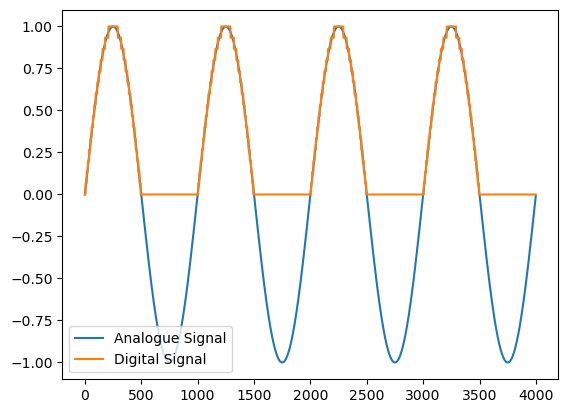

In [7]:
# We have made a BASIC digitiser - check it out above.
# Let's test it out using a sinusoid
samples = 1000
timebase = np.arange(0, 8*np.pi, 2*np.pi/samples)
signal = np.sin(timebase)
plt.plot(signal,'-')

plt.plot(adc1(signal, 4, (0,1)),'-')
plt.legend(["Analogue Signal", "Digital Signal"])

**Homework:**

1. Play around with the bit depth and the range - try poorly optimised values and see how that affects the digitised signal.
2. Take a look at [Michael's Notes](https://github.com/phys3112/intro/blob/master/mcba3-analog-to-digital-conversion.ipynb) and modify the ADC to add noise to the signal - then also write something to average these noisy values into a 'smoother' digital output!

# Random number generators

My random number generator formula (a bit more readable than code)
$$ Random(value,maximum) = (13 \times value + 2^{12} - 1) \ \% \ maximum $$

In [8]:
def my_random(current_value, maximum):
    return int( np.mod(13*current_value + 2**12 - 1 , maximum)) # same fromat as LCG but numbers arn't chosen well

Text(0.5, 0, 'Sequence number')

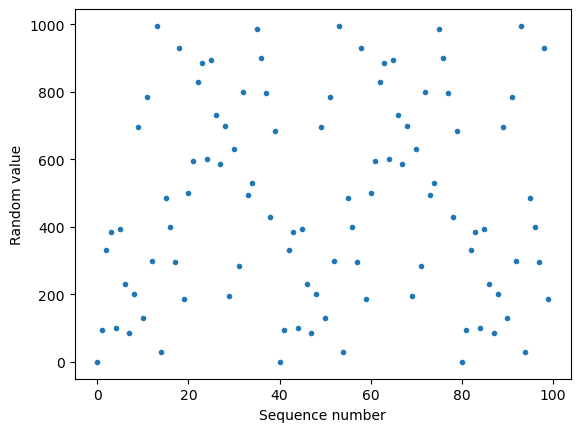

In [11]:
maximum = 1000
starter_value = 4

# make some random numbers
num_vals = 100
vals = list()
curr_val = 0
for i in range(num_vals):
    vals.append(curr_val)
    curr_val = my_random(curr_val, maximum)
    
# Lets have a look at the numbers
plt.plot(vals,'.')
plt.ylabel("Random value")
plt.xlabel("Sequence number")

In [6]:
# Use time as a seed so that it repeats less predictably
time.time_ns()

1615157690376978100

**Homework**

Write your own implementation of any random number generator. You may wish to take a look at [Michael's Notes](https://github.com/phys3112/intro/blob/master/mcba6-random-numbers.ipynb). The challenge here is to see how random your random number generator is; save the output to a file and attempt to compress it! If you can't reduce the file size, then you're doing a good job!